In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def player_dataframe(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            table_body = soup.find_all("tbody", class_="Table__TBODY")

            result = []
            if table_body:
                for table in table_body:
                    rows = []
                    for row in table.find_all("tr"):
                        row_data = [td.text.strip() for td in row.find_all("td")]
                        rows.append(row_data)

                    for row in rows:
                        result.append(row)

            col_names = []
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")
                th_tags = soup.find_all("th", class_="evt-col") + soup.find_all("th", title=True)
                th_texts = [th.text.strip() for th in th_tags]
                for th_text in th_texts:
                    col_names.append(th_text)

            unique_values = []
            [unique_values.append(x) for x in col_names if x not in unique_values]
            unique_values = unique_values[:-7]
            columns = unique_values
            
            player_data = pd.DataFrame(data=result, columns=columns)
            player_data.replace('None', None, inplace=True)
            player_data.dropna(inplace=True)
            player_data = player_data[::-1]
            player_data.reset_index(drop=True, inplace=True)

            return player_data

    except requests.exceptions.RequestException as e:
        print("Failed to retrieve the page:", e)

# Example usage:
url = "https://www.espn.com/nba/player/gamelog/_/id/6475/klay-thompson"
thompson = player_dataframe(url)

thompson


,Date,OPP,Result,MIN,FG,FG%,3PT,3P%,FT,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,Sat 10/7,vsLAL,W125-108,13,2-8,25.0,2-7,28.6,4-6,66.7,4,0,1,0,0,2,10
1,Fri 10/13,@LAL,W129-125,23,3-10,30.0,2-4,50.0,0-0,0.0,3,2,0,0,1,0,8
2,Sun 10/15,@SAC,W121-115 OT,17,4-9,44.4,2-3,66.7,2-2,100.0,3,0,0,0,1,1,12
3,Wed 10/18,vsSAC,W116-115,32,2-10,20.0,1-4,25.0,0-0,0.0,7,4,0,0,1,3,5
4,Fri 10/20,vsSA,L122-117,18,3-13,23.1,1-8,12.5,2-2,100.0,3,0,0,0,2,1,9
5,Tue 10/24,vsPHX,L108-104,36,6-18,33.3,3-11,27.3,0-0,0.0,7,3,1,0,3,3,15
6,Fri 10/27,@SAC,W122-114,33,7-12,58.3,2-4,50.0,2-2,100.0,3,4,0,1,4,3,18
7,Sun 10/29,@HOU,W106-95,29,7-12,58.3,5-10,50.0,0-0,0.0,4,0,1,0,3,1,19
8,Wed 11/1,vsSAC,W102-101,29,6-15,40.0,1-4,25.0,1-1,100.0,2,2,3,0,3,2,14
9,Fri 11/3,@OKC,W141-139,33,6-10,60.0,4-6,66.7,2-2,100.0,3,1,0,0,4,1,18


In [18]:
thompson_name = 'Klay Thompson'

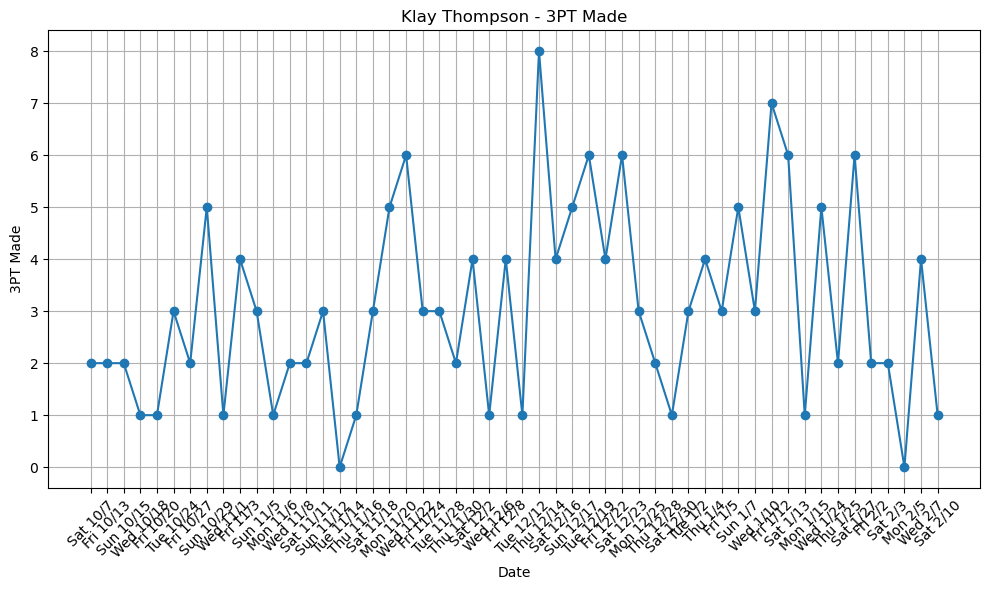

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_player_data(player_data, player_name):
    # Extracting the 'Date' and '3PT' columns
    dates = player_data['Date']
    three_pointers = player_data['3PT']
    three_pointers = three_pointers.apply(lambda x: int(x[0]))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, three_pointers, marker='o', linestyle='-')
    plt.title(f'{player_name} - 3PT Made')
    plt.xlabel('Date')
    plt.ylabel('3PT Made')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

plot_player_data(thompson, thompson_name)


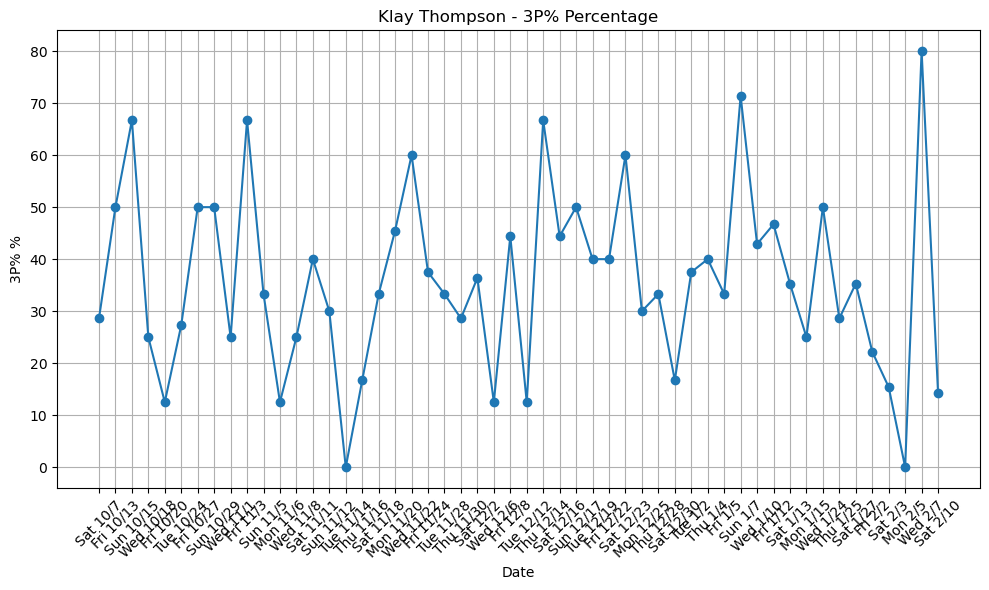

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_player_percentage(player_data, column_name, player_name):
    # Extracting the 'Date' and specified column
    dates = player_data['Date']
    percentages = player_data[column_name]
    percentages = percentages.apply(lambda x: float(x))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, percentages, marker='o', linestyle='-')
    plt.title(f'{player_name} - {column_name} Percentage')
    plt.xlabel('Date')
    plt.ylabel(f'{column_name} %')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

plot_player_percentage(thompson, '3P%', thompson_name)


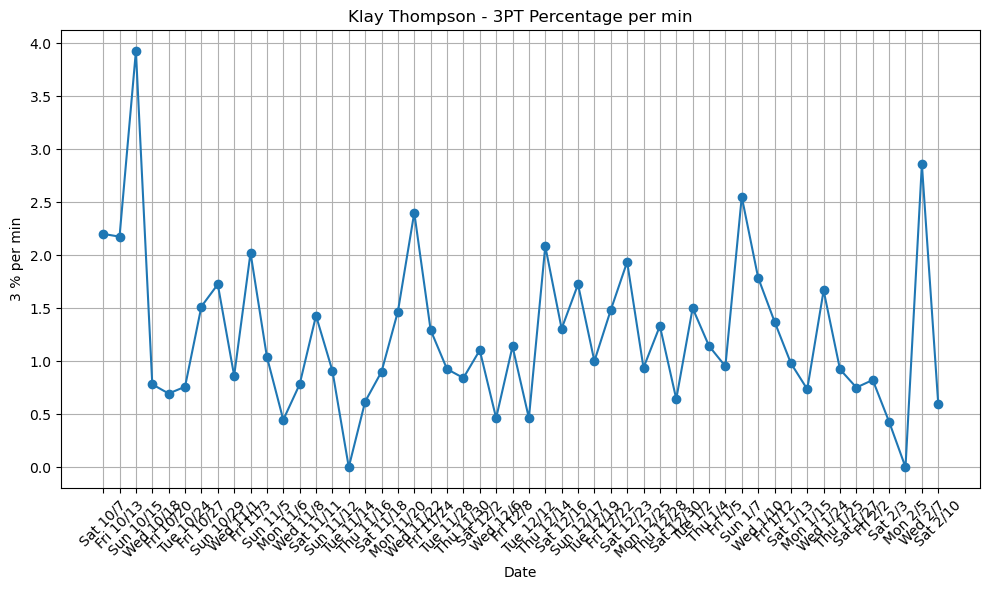

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_player_3percentage_per_min(player_data, player_name):
    # Extracting the 'Date' and specified column
    dates = player_data['Date']
    percentages = player_data['3P%']
    mins = player_data['MIN']
    percentages = percentages.apply(lambda x: float(x))
    mins = mins.apply(lambda x: float(x))
    divided_list = [a / b for a, b in zip(percentages, mins)]

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(dates, divided_list, marker='o', linestyle='-')
    plt.title(f'{player_name} - 3PT Percentage per min')
    plt.xlabel('Date')
    plt.ylabel('3 % per min')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

plot_player_3percentage_per_min(thompson, thompson_name)


In [22]:
# Example usage:
url = "https://www.espn.com/nba/player/gamelog/_/id/3136193/devin-booker"
booker = player_dataframe(url)
booker_name = 'Devin Booker'
booker

,Date,OPP,Result,MIN,FG,FG%,3PT,3P%,FT,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,Sun 10/8,@DET,W130-126 OT,15,5-9,55.6,2-4,50.0,0-0,0.0,0,2,0,0,2,1,12
1,Thu 10/12,@POR,W122-111,21,7-15,46.7,3-6,50.0,1-1,100.0,1,5,0,1,2,0,18
2,Mon 10/16,vsPOR,W117-106,18,6-11,54.5,4-6,66.7,3-3,100.0,2,4,0,2,2,3,19
3,Tue 10/24,@GS,W108-104,37,13-21,61.9,3-8,37.5,3-3,100.0,6,8,0,1,4,6,32
4,Thu 11/2,vsSA,L132-121,35,10-19,52.6,5-7,71.4,6-6,100.0,9,13,0,0,4,5,31
5,Wed 11/15,vsMIN,W133-115,26,12-22,54.5,2-7,28.6,5-5,100.0,4,5,0,0,2,2,31
6,Fri 11/17,@UTAH,W131-128,32,7-15,46.7,2-3,66.7,8-10,80.0,4,15,0,0,3,1,24
7,Sun 11/19,@UTAH,W140-137 2OT,40,8-21,38.1,2-7,28.6,8-8,100.0,5,8,1,0,5,3,26
8,Tue 11/21,vsPOR,W120-107,33,9-20,45.0,0-3,0.0,10-10,100.0,3,6,1,1,1,1,28
9,Wed 11/22,vsGS,W123-115,31,5-15,33.3,2-3,66.7,13-14,92.9,8,10,0,1,2,3,25


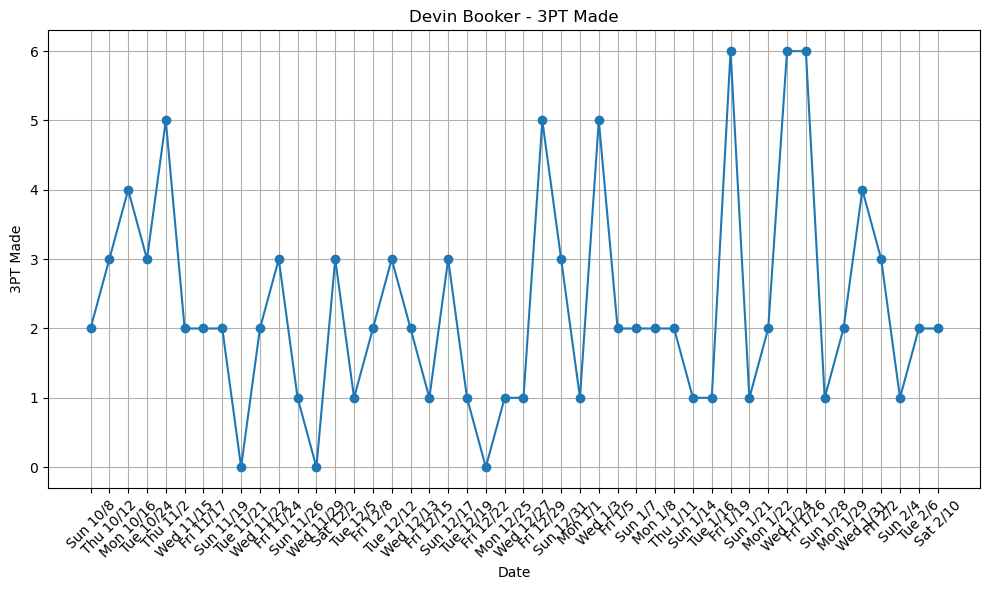

In [23]:
plot_player_data(booker, booker_name)

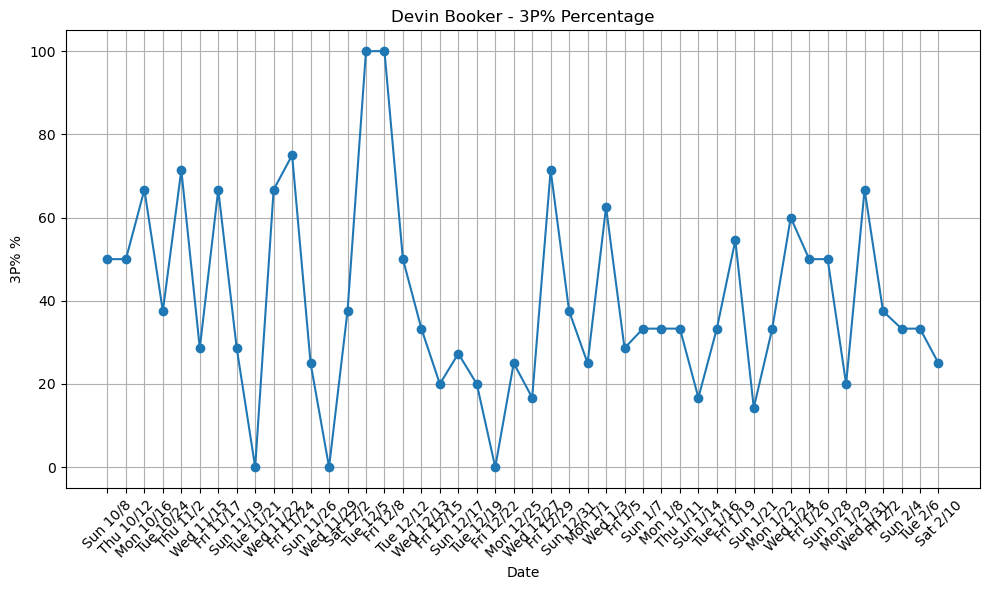

In [24]:
plot_player_percentage(booker, '3P%', booker_name)

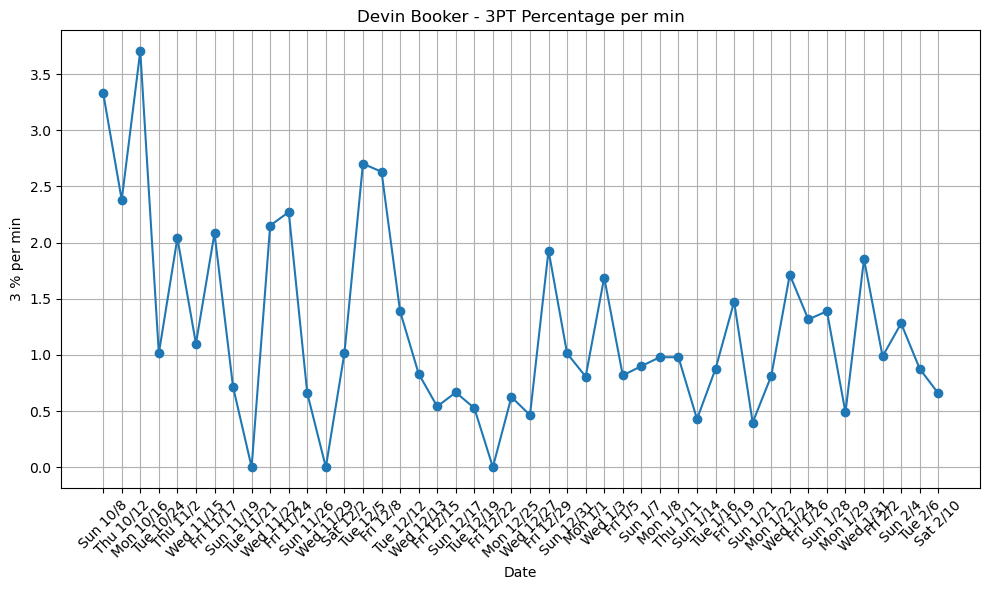

In [25]:
plot_player_3percentage_per_min(booker, booker_name)

In [28]:
def plot_players_3percentage_per_min(player_data_list, player_name_list):
    # Plotting the data for each player
    plt.figure(figsize=(10, 6))
    for player_data, player_name in zip(player_data_list, player_name_list):
        # Extracting the 'Date' and specified columns
        dates = player_data['Date']
        dates = pd.to_datetime(player_data['Date'])
        percentages = player_data['3P%']
        mins = player_data['MIN']
        
        # Convert percentages and minutes to float
        percentages = percentages.apply(lambda x: float(x))
        mins = mins.apply(lambda x: float(x))
        
        # Calculate 3PT percentage per minute
        divided_list = [a / b for a, b in zip(percentages, mins)]

        # Plotting the data for the player
        plt.plot(dates, divided_list, marker='o', linestyle='-', label=f'{player_name}')

    # Adding titles, labels, and legends
    plt.title('3PT Percentage per min')
    plt.xlabel('Date')
    plt.ylabel('3 % per min')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.legend()

    # Show plot
    plt.show()